# Week12 Ensemble Machine Learning


In week12, we've covered:
* **Ensemble Machine Learning**

Ensemble Learning is a process using which multiple machine learning models are strategically constructed to solve a particular problem. There are three main terms describing it:
* Bagging to decrease the model’s variance;
* Boosting to decrease the model’s bias;
* Stacking to increase the predictive force of the classifier.

As you can see, each has its own advantages/weaknesses. Which one to use and then depends on the problem at hand. Applying ensemble methods could reduce the error **(Bias + Variance + Irreducible error)** emerging from a machine model, but remember, a more complexed model may result in overfitting problem. 


The best way to consolidate the knowledge in your mind is by practicing.<br>Please complete the part marked with <span style="color:green">**# TODO**</span>.

[Google](www.google.com), [Python Documentation](https://docs.python.org/3/contents.html), and [scikit-learn Documentation](https://scikit-learn.org/stable/) are your good friends if you have any python questions.

Download **Week12_ensemble-machine-learning.ipynb** notebook to your local folder and open it with Jupyter Notebook.

### Data Loading and EDA

Libraries Installation
    

In [2]:
# TODO
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Data Loading

In [3]:
# TODO
df = pd.read_csv('./heart_data.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
1,59,1,2,150,212,1,1,157,0,1.6,2,0,2,1
2,51,1,2,110,175,0,1,123,0,0.6,2,0,2,1
3,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
4,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,58,1,0,100,234,0,1,156,0,0.1,2,1,3,0
299,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
300,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
301,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0


#### Columns of Dataset

* age: age in years
* sex: (1 = male; 0 = female)
* cp: chest pain type
* trestbps: resting blood pressure: (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target: 1 or 0

Data Exploration

In [4]:
# TODO
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Data Visualization -- use seaborn to plot graphs to help you better understand this dataset

age
----------
58    19
57    17
54    16
59    14
52    13
51    12
56    11
62    11
44    11
60    11
64    10
41    10
67     9
63     9
55     8
65     8
53     8
45     8
42     8
61     8
43     8
46     7
50     7
66     7
48     7
47     5
49     5
39     4
68     4
70     4
35     4
40     3
38     3
71     3
69     3
37     2
34     2
74     1
76     1
29     1
77     1
Name: age, dtype: int64


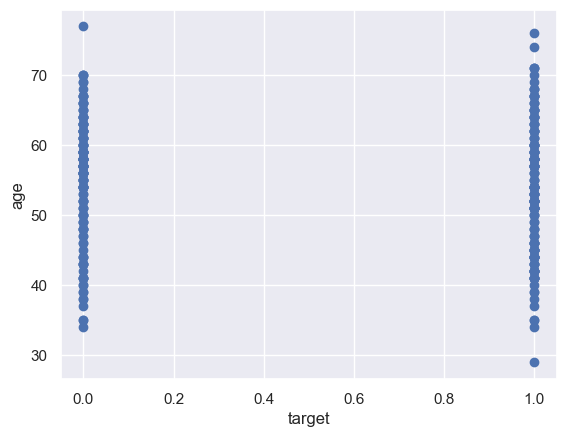

sex
----------
1    207
0     96
Name: sex, dtype: int64


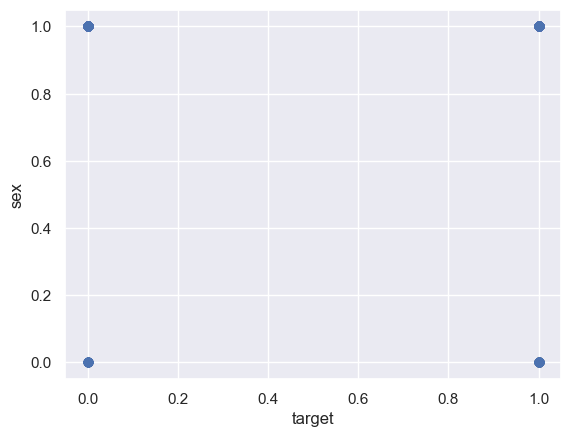

cp
----------
0    143
2     87
1     50
3     23
Name: cp, dtype: int64


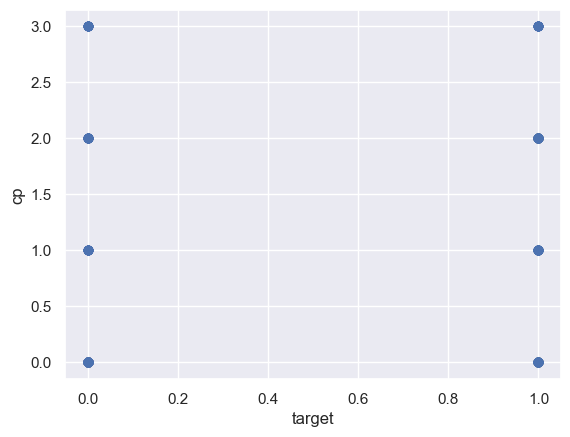

trestbps
----------
120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
135     6
108     6
124     6
145     5
152     5
134     5
100     4
170     4
122     4
115     3
142     3
126     3
136     3
180     3
105     3
148     2
144     2
102     2
94      2
146     2
178     2
200     1
165     1
174     1
192     1
117     1
172     1
106     1
164     1
114     1
154     1
156     1
129     1
101     1
155     1
104     1
123     1
Name: trestbps, dtype: int64


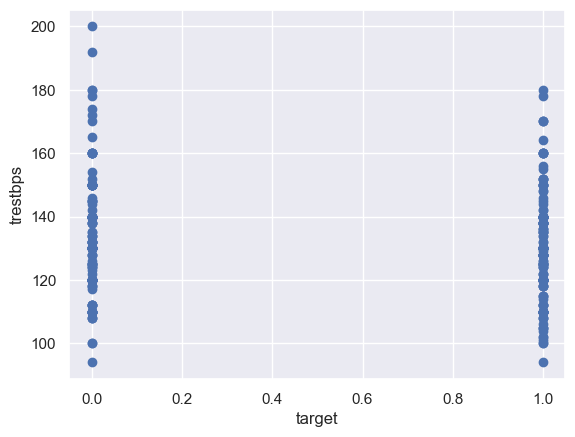

chol
----------
197    6
204    6
234    6
269    5
254    5
      ..
160    1
141    1
257    1
340    1
237    1
Name: chol, Length: 152, dtype: int64


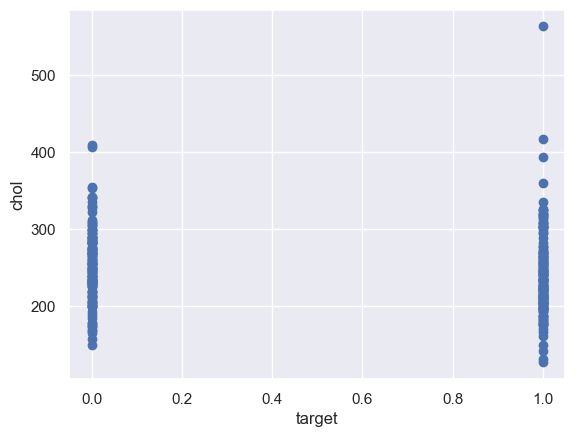

fbs
----------
0    258
1     45
Name: fbs, dtype: int64


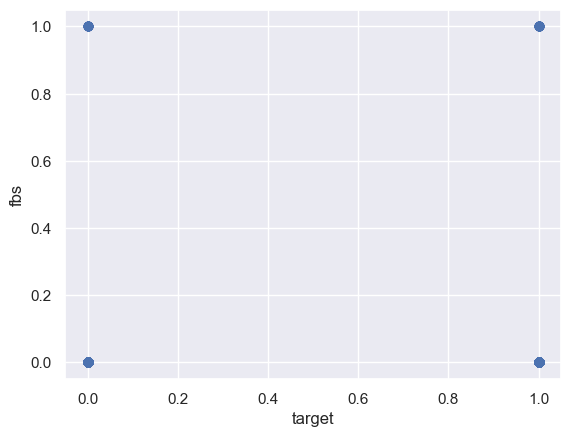

restecg
----------
1    152
0    147
2      4
Name: restecg, dtype: int64


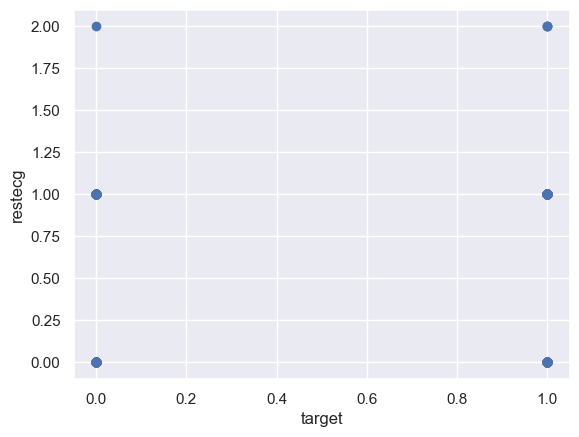

thalach
----------
162    11
160     9
163     9
173     8
152     8
       ..
202     1
190     1
185     1
188     1
118     1
Name: thalach, Length: 91, dtype: int64


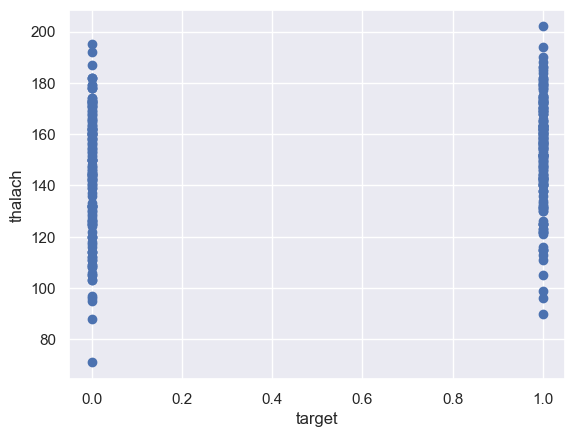

exang
----------
0    204
1     99
Name: exang, dtype: int64


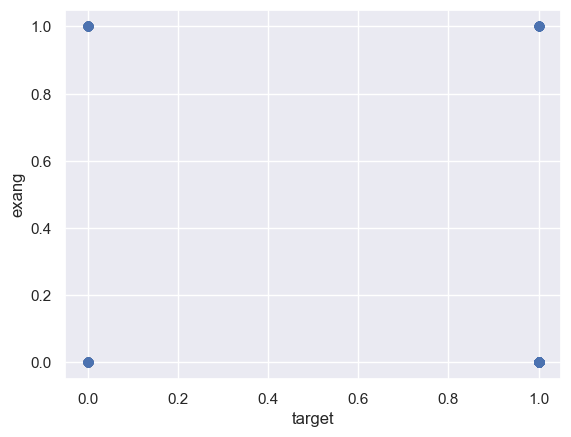

oldpeak
----------
0.0    99
1.2    17
1.0    14
0.6    14
0.8    13
1.4    13
0.2    12
1.6    11
1.8    10
2.0     9
0.4     9
0.1     7
2.6     6
2.8     6
3.0     5
1.9     5
1.5     5
0.5     5
3.6     4
2.2     4
3.4     3
4.0     3
0.3     3
2.4     3
0.9     3
4.2     2
2.5     2
3.2     2
2.3     2
1.1     2
3.5     1
1.3     1
3.1     1
0.7     1
4.4     1
6.2     1
5.6     1
2.9     1
2.1     1
3.8     1
Name: oldpeak, dtype: int64


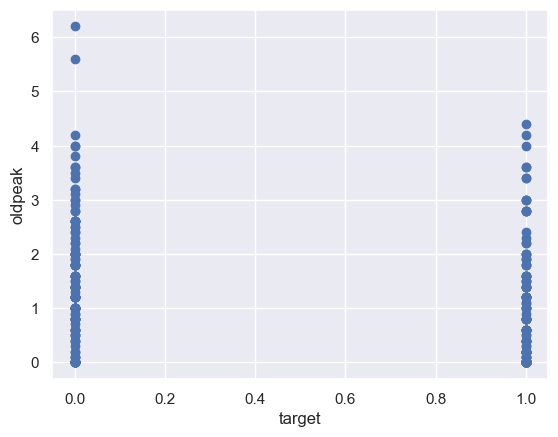

slope
----------
2    142
1    140
0     21
Name: slope, dtype: int64


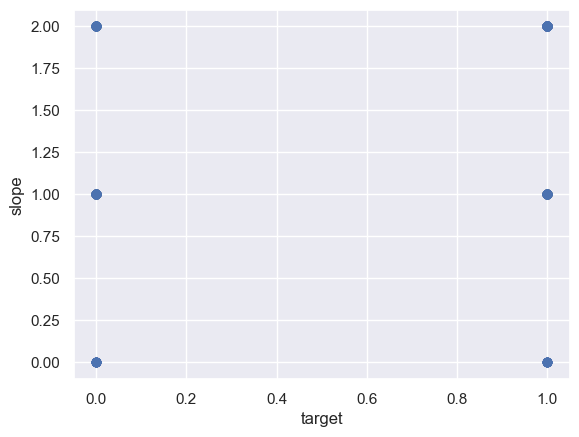

ca
----------
0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64


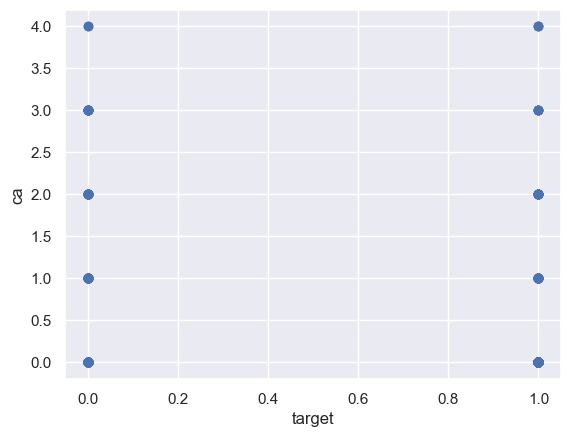

thal
----------
2    166
3    117
1     18
0      2
Name: thal, dtype: int64


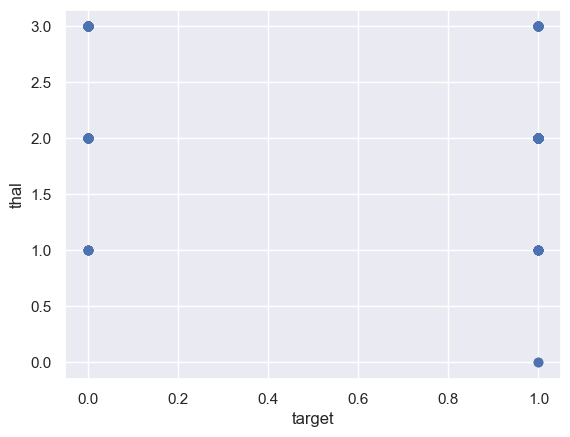

In [5]:
target = 'target'
features = [ c for c in df.columns if c != target]


for f in features:
    print(f,"\n----------\n",df[f].value_counts(), sep="")
    plt.scatter(df[target], df[f])
    plt.xlabel(target) 
    plt.ylabel(f) 
    plt.show()

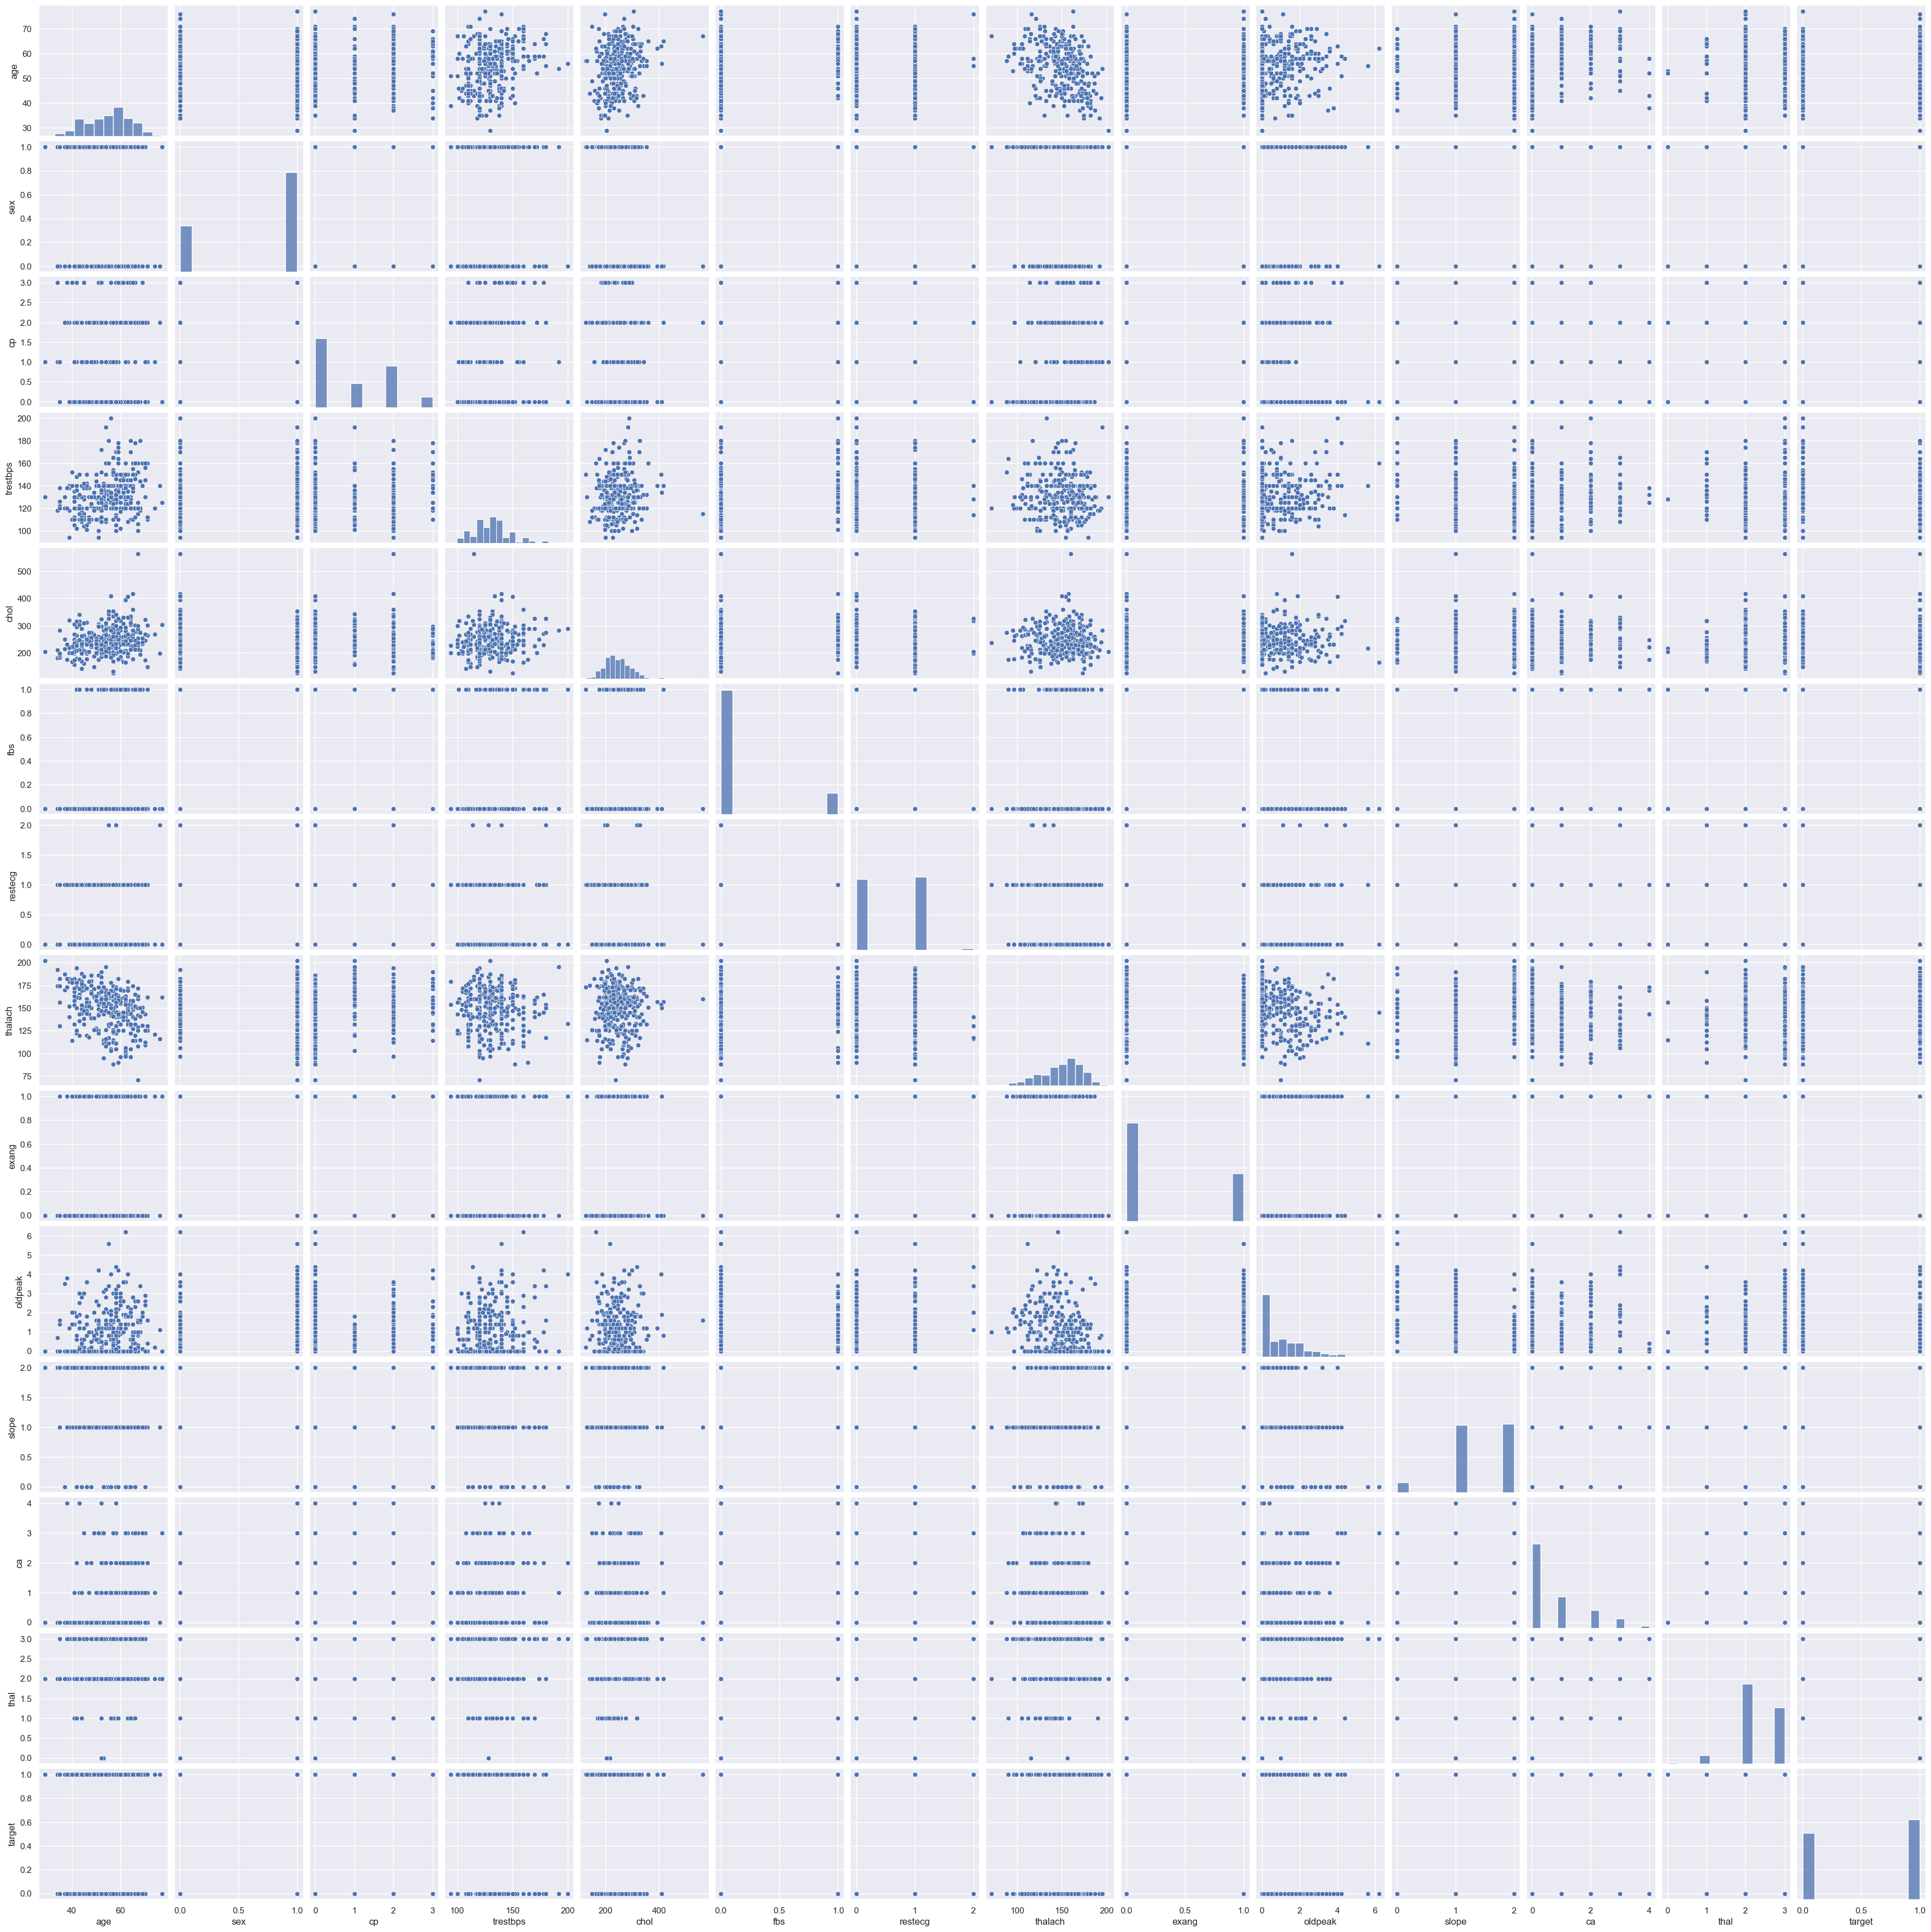

In [ ]:
# TODO
sns.pairplot(df)

<AxesSubplot:>

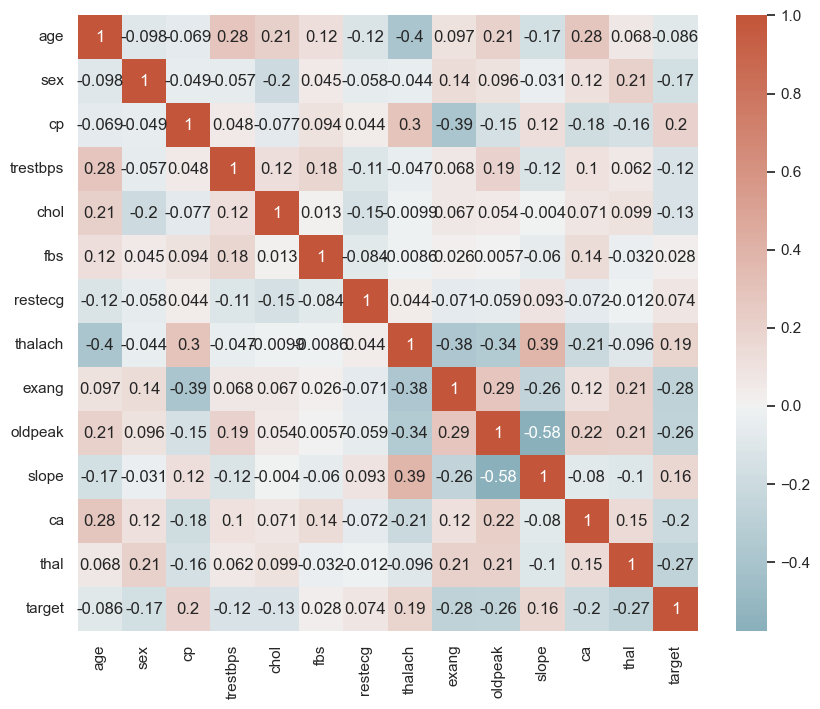

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), center=0, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))


In [9]:
df.corr()['target'].sort_values()
selected_features = ['exang', 'thal', 'oldpeak', 'ca', 'cp', 'thalach']
#features = selected_features

Hopefully you have already built up some understandings of this dataset, now let's use this dataset to classify whether a person is suffering from a heart disease or not.

### Data Preprocessing

In [10]:
# Scale just in case
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[features])
scaled =  pd.DataFrame(scaler.transform(df[features]), columns=features)
scaled[target] =[i for i in df[target]]


train_scaled, test_scaled= train_test_split(scaled, test_size=0.25, random_state=42)
train_scaled

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
287,-0.150692,0.681005,-0.938515,-0.492528,0.690615,-0.417635,0.898962,-2.389735,1.435481,0.828529,-0.649113,1.244593,1.123029,0
282,-0.481558,0.681005,-0.938515,0.706843,-0.894075,-0.417635,-1.005832,-1.034089,1.435481,-0.120436,-0.649113,-0.714429,1.123029,0
197,0.400752,0.681005,0.032031,-0.663867,0.729266,-0.417635,-1.005832,0.452748,-0.696631,0.655990,-0.649113,-0.714429,-0.512922,0
158,0.952197,-1.468418,-0.938515,-0.435415,-0.952051,-0.417635,0.898962,-0.596784,1.435481,-0.896862,-0.649113,-0.714429,-0.512922,1
164,0.290464,-1.468418,0.032031,-0.092738,-0.198357,-0.417635,-1.005832,1.064975,-0.696631,-0.896862,-0.649113,0.265082,-0.512922,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0.731619,0.681005,1.002577,1.049520,-0.063079,2.394438,0.898962,-0.553054,1.435481,-0.034166,-0.649113,-0.714429,-0.512922,0
71,0.841908,-1.468418,-0.938515,0.478391,2.855069,-0.417635,-1.005832,0.321556,-0.696631,0.138373,-0.649113,-0.714429,-0.512922,1
106,-0.591847,-1.468418,0.032031,0.135714,0.478035,-0.417635,0.898962,0.540209,-0.696631,-0.896862,-0.649113,-0.714429,-0.512922,1
270,-0.702136,0.681005,-0.938515,-0.435415,0.536011,-0.417635,-1.005832,0.715131,-0.696631,-0.465514,-0.649113,-0.714429,1.123029,0


### Modeling

In [57]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


results=[]

def print_metrics(real, predicted, lb):
    
    acc = accuracy_score(real, predicted)
    auc = roc_auc_score(lb.transform(real), lb.transform(predicted))
    print("Accuracy Score: {0:.4f}\n".format(acc))
    print("Classification Report: \n{}\n".format(classification_report(real, predicted)))
    print("Confusion Matrix: \n{}\n".format(confusion_matrix(real, predicted)))
    print("ROC AUC: \n{}\n".format(auc))
    return acc, auc
    
def print_score(classifier, X_train, X_test, y_train, y_test, train=True):
    print("---------------------------------------------------------------------------\n")

    lb= preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        print("Train:\n")
        pred = classifier.predict(X_train)
        acc, auc = print_metrics(y_train, pred, lb)
    else:
        print("Test:\n")
        pred = classifier.predict(X_test)
        acc, auc = print_metrics(y_test, pred, lb)
    return acc, auc


#### Logistic Regression

Let's build a classic logistic regression model as a baseline to see how it performs

In [58]:
# TODO
from sklearn.linear_model import LogisticRegression

X = train_scaled[features]
y = train_scaled[target]
clf = LogisticRegression(random_state=0).fit(X, y)
clf.predict_proba(test_scaled[features])

print("LogisticRegression Only:\n")
acc_train, _ = print_score(clf, X,test_scaled[features], y, test_scaled[target], True)
acc_test, _ = print_score(clf, X,test_scaled[features], y, test_scaled[target], False)
results.append({'model':'LogisticRegression', 'train_accuracy':acc_train, 'test_accuracy':acc_test})
results

LogisticRegression Only:

---------------------------------------------------------------------------

Train:

Accuracy Score: 0.7137

Classification Report: 
              precision    recall  f1-score   support

           0       0.73      0.60      0.66       104
           1       0.70      0.81      0.75       123

    accuracy                           0.71       227
   macro avg       0.72      0.70      0.71       227
weighted avg       0.72      0.71      0.71       227


Confusion Matrix: 
[[ 62  42]
 [ 23 100]]

ROC AUC: 
0.7045809881175734

---------------------------------------------------------------------------

Test:

Accuracy Score: 0.6579

Classification Report: 
              precision    recall  f1-score   support

           0       0.63      0.56      0.59        34
           1       0.67      0.74      0.70        42

    accuracy                           0.66        76
   macro avg       0.65      0.65      0.65        76
weighted avg       0.66      0.66   

[{'model': 'LogisticRegression',
  'train_accuracy': 0.7136563876651982,
  'test_accuracy': 0.6578947368421053}]

In [59]:
from sklearn.ensemble import BaggingClassifier
bag_classifier = BaggingClassifier(base_estimator=clf, n_estimators=1000, bootstrap=True, n_jobs=1, random_state=42)
bag_classifier.fit(train_scaled[features], train_scaled[target])
print("Bagging Classifier oob_score=False:\n")
acc_train, _ =print_score(bag_classifier, X,test_scaled[features], y, test_scaled[target], True)
acc_test, _ = print_score(bag_classifier, X,test_scaled[features], y, test_scaled[target], False)
results.append({'model':'BaggingClassifier', 'train_accuracy':acc_train, 'test_accuracy':acc_test})


Bagging Classifier oob_score=False:

---------------------------------------------------------------------------

Train:

Accuracy Score: 0.7137

Classification Report: 
              precision    recall  f1-score   support

           0       0.73      0.60      0.66       104
           1       0.70      0.81      0.75       123

    accuracy                           0.71       227
   macro avg       0.72      0.70      0.71       227
weighted avg       0.72      0.71      0.71       227


Confusion Matrix: 
[[ 62  42]
 [ 23 100]]

ROC AUC: 
0.7045809881175734

---------------------------------------------------------------------------

Test:

Accuracy Score: 0.6447

Classification Report: 
              precision    recall  f1-score   support

           0       0.62      0.53      0.57        34
           1       0.66      0.74      0.70        42

    accuracy                           0.64        76
   macro avg       0.64      0.63      0.63        76
weighted avg       0.64  

In [60]:
from sklearn.ensemble import BaggingClassifier
bag_classifier = BaggingClassifier(base_estimator=clf, n_estimators=1000, bootstrap=True, n_jobs=1, random_state=42, oob_score=True)
bag_classifier.fit(train_scaled[features], train_scaled[target])
print("Bagging Classifier oob_score=True:\n")

acc_train, _ = print_score(bag_classifier, X,test_scaled[features], y, test_scaled[target], True)
acc_test, _ = print_score(bag_classifier, X,test_scaled[features], y, test_scaled[target], False)
results.append({'model':'BaggingClassifier (oob_score=True)', 'train_accuracy':acc_train, 'test_accuracy':acc_test})


Bagging Classifier oob_score=True:

---------------------------------------------------------------------------

Train:

Accuracy Score: 0.7137

Classification Report: 
              precision    recall  f1-score   support

           0       0.73      0.60      0.66       104
           1       0.70      0.81      0.75       123

    accuracy                           0.71       227
   macro avg       0.72      0.70      0.71       227
weighted avg       0.72      0.71      0.71       227


Confusion Matrix: 
[[ 62  42]
 [ 23 100]]

ROC AUC: 
0.7045809881175734

---------------------------------------------------------------------------

Test:

Accuracy Score: 0.6447

Classification Report: 
              precision    recall  f1-score   support

           0       0.62      0.53      0.57        34
           1       0.66      0.74      0.70        42

    accuracy                           0.64        76
   macro avg       0.64      0.63      0.63        76
weighted avg       0.64   

Which ensemble model would you suggest to try out and why?

In [15]:
# TODO


#### Random Forest

Train a Random Forest model and perform predictions on test set

In [61]:
# TODO 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X,y)
print("Random Forest:\n")
acc_train, _ = print_score(rf_clf, X,test_scaled[features], y, test_scaled[target], True)
acc_test, _ = print_score(rf_clf, X,test_scaled[features], y, test_scaled[target], False)
results.append({'model':'RandomForest', 'train_accuracy':acc_train, 'test_accuracy':acc_test})

Random Forest:

---------------------------------------------------------------------------

Train:

Accuracy Score: 1.0000

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00       123

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227


Confusion Matrix: 
[[104   0]
 [  0 123]]

ROC AUC: 
1.0

---------------------------------------------------------------------------

Test:

Accuracy Score: 0.6842

Classification Report: 
              precision    recall  f1-score   support

           0       0.66      0.62      0.64        34
           1       0.70      0.74      0.72        42

    accuracy                           0.68        76
   macro avg       0.68      0.68      0.68        76
weighted avg       0.68      0.68      0.68        76


Confu

How would you evaluate the model performance?

In [17]:
# TODO We can check which parameters perform the best=
params_grid = {'max_depth':[i +1 for i in range(4)] + [None], 
               'min_samples_split':[ i+2 for i in range(5)],
               'min_samples_leaf':[i+1 for i in range(2)], 
               'bootstrap':[True,False], 
               'criterion':["gini"]}
# Uncomment and it will take a while
grid_search = GridSearchCV(rf_clf, params_grid, n_jobs=1, cv=5, verbose=1, scoring='accuracy')
grid_search.fit(X,y)


Fitting 5 folds for each of 3456 candidates, totalling 17280 fits
Grid Search on Random Forest:

Best Params:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 6}
---------------------------------------------------------------------------

Train:

Accuracy Score: 0.8238

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.71      0.79       104
           1       0.79      0.92      0.85       123

    accuracy                           0.82       227
   macro avg       0.84      0.82      0.82       227
weighted avg       0.83      0.82      0.82       227


Confusion Matrix: 
[[ 74  30]
 [ 10 113]]

ROC AUC: 
0.8151188242651658

---------------------------------------------------------------------------

Test:

Accuracy Score: 0.7500

Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.65      0.70        34
          

In [62]:
print("Grid Search on Random Forest:\n")

print("Best Params: ",grid_search.best_params_)
print_score(grid_search, X,test_scaled[features], y, test_scaled[target], True)
print_score(grid_search, X,test_scaled[features], y, test_scaled[target], False)

acc_train, _ = print_score(grid_search, X,test_scaled[features], y, test_scaled[target], True)
acc_test, _ = print_score(grid_search, X,test_scaled[features], y, test_scaled[target], False)
results.append({'model':'GridSearch (Best Params)', 'train_accuracy':acc_train, 'test_accuracy':acc_test})

Grid Search on Random Forest:

Best Params:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 6}
---------------------------------------------------------------------------

Train:

Accuracy Score: 0.8238

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.71      0.79       104
           1       0.79      0.92      0.85       123

    accuracy                           0.82       227
   macro avg       0.84      0.82      0.82       227
weighted avg       0.83      0.82      0.82       227


Confusion Matrix: 
[[ 74  30]
 [ 10 113]]

ROC AUC: 
0.8151188242651658

---------------------------------------------------------------------------

Test:

Accuracy Score: 0.7500

Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.65      0.70        34
           1       0.74      0.83      0.79        42

    accuracy         

Can you improve the model?

In [19]:
# Todo Yes we could try different parameters and figure out the best one. It improve to a 74 AUC

Please explain how you improved random forest model performance.

In [ ]:
# Used the GridSearchCV to perform the analysis on different parametes and get the parameters that would deliver the best performance based on accuracy

In [38]:
# Todo
best_rf_model = RandomForestClassifier(**grid_search.best_params_)# Redefining random forest with best params 
best_rf_model.fit(X,y)
importances = best_rf_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
for f in range(len(features)):
    print(f"{f+1}: ", features[sorted_indices[f]],importances[sorted_indices[f]])


1:  oldpeak 0.16439591740983936
2:  chol 0.12304507932268345
3:  thal 0.11957559830599206
4:  cp 0.10832215813016907
5:  thalach 0.10406670320095074
6:  age 0.09963861646260362
7:  trestbps 0.08351153430384702
8:  exang 0.06872821566012031
9:  ca 0.03983473394625298
10:  sex 0.032418042151296074
11:  slope 0.024230536675212303
12:  restecg 0.019445730608377496
13:  fbs 0.012787133822655436


What are the five most important variables and how do you know?

In [37]:
# 1:  oldpeak 0.1611212355912121
# 2:  chol 0.1418191676106175
# 3:  cp 0.12132366501918622
# 4:  thal 0.12099671823831785
# 5:  thalach 0.09538446348723291

In [35]:
# * age: age in years
# * sex: (1 = male; 0 = female)
# * cp: chest pain type
# * trestbps: resting blood pressure: (in mm Hg on admission to the hospital)
# * chol: serum cholestoral in mg/dl
# * fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
# * restecg: resting electrocardiographic results
# * thalach: maximum heart rate achieved
# * exang: exercise induced angina (1 = yes; 0 = no)
# * oldpeak: ST depression induced by exercise relative to rest
# * slope: the slope of the peak exercise ST segment
# * ca: number of major vessels (0-3) colored by flourosopy
# * thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
# * target: 1 or 0

#### Boosting

Fit a boosting model

In [41]:
best_rf_model

RandomForestClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=6)

In [63]:
# Todo
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

adf_clr = AdaBoostClassifier(best_rf_model)
adf_clr.fit(X,y)

acc_train, _ = print_score(adf_clr, X,test_scaled[features], y, test_scaled[target], True)
acc_test, _ = print_score(adf_clr, X,test_scaled[features], y, test_scaled[target], False)
results.append({'model':'AdaBoost (RF)', 'train_accuracy':acc_train, 'test_accuracy':acc_test})

---------------------------------------------------------------------------

Train:

Accuracy Score: 1.0000

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00       123

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227


Confusion Matrix: 
[[104   0]
 [  0 123]]

ROC AUC: 
1.0

---------------------------------------------------------------------------

Test:

Accuracy Score: 0.6447

Classification Report: 
              precision    recall  f1-score   support

           0       0.61      0.56      0.58        34
           1       0.67      0.71      0.69        42

    accuracy                           0.64        76
   macro avg       0.64      0.64      0.64        76
weighted avg       0.64      0.64      0.64        76


Confusion Matrix: 
[[

In [64]:
gb_clr = GradientBoostingClassifier()
gb_clr.fit(X,y)

acc_train, _ = print_score(gb_clr, X,test_scaled[features], y, test_scaled[target], True)
acc_test, _ = print_score(gb_clr, X,test_scaled[features], y, test_scaled[target], False)
results.append({'model':'AdaBoost (RF)', 'train_accuracy':acc_train, 'test_accuracy':acc_test})

---------------------------------------------------------------------------

Train:

Accuracy Score: 0.9824

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       104
           1       0.98      0.98      0.98       123

    accuracy                           0.98       227
   macro avg       0.98      0.98      0.98       227
weighted avg       0.98      0.98      0.98       227


Confusion Matrix: 
[[102   2]
 [  2 121]]

ROC AUC: 
0.9822545340838024

---------------------------------------------------------------------------

Test:

Accuracy Score: 0.6579

Classification Report: 
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        34
           1       0.69      0.69      0.69        42

    accuracy                           0.66        76
   macro avg       0.65      0.65      0.65        76
weighted avg       0.66      0.66      0.66        76


Confus

### Model Comparison

We are interested in how to classify/predict heart disease. What metrics should be considered to evaluate model performance, in addition to accuracy?

In [15]:
# TODO
# We should consider precision,  recall,f1-score as well as counting the false negatives. I understand we should focus more importance on that metric becuse we would
# be not treating someone that needs to be treaterd

Compare and contrast the above 3 models (logistic regression, random forest, boosting) that you just built.

In [68]:
# TODO

# Basing it off the best accurasy on testing the GridSearch parameterization was had the best performance
pd.DataFrame.from_records(results)

,model,train_accuracy,test_accuracy
0,LogisticRegression,0.713656,0.657895
1,BaggingClassifiert,0.713656,0.644737
2,BaggingClassifier (oob_score=True),0.713656,0.644737
3,RandomForest,1.000000,0.684211
4,GridSearch (Best Params),0.823789,0.750000
5,AdaBoost (RF),1.000000,0.644737
6,AdaBoost (RF),0.982379,0.657895


## Submission

Commit your completed **Week12_ensemble-machine-learning.ipynb** notebook to your personal Github repo you shared with the faculty.